In [23]:
import numpy as np
import matplotlib.pyplot as plt

# N (each class)
N = 10

# generate original data
C1_X = np.random.uniform(0,4,N)
C1_Y = np.random.uniform(0,4,N)
C2_X = np.random.uniform(3,7,N)
C2_Y = np.random.uniform(3,8,N)
T1 = np.array([1 for i in range(N)])
T2 = np.array([2 for i in range(N)])
X_data = np.hstack((C1_X,C2_X))
Y_data = np.hstack((C1_Y,C2_Y))
T_data = np.hstack((T1,T2))

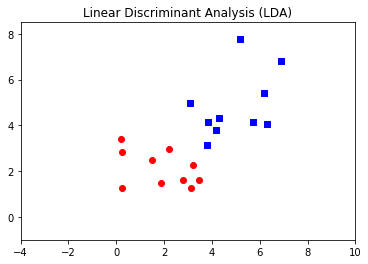

In [24]:
# setting the plot
fig, ax = plt.subplots()
ax.set_title('Linear Discriminant Analysis (LDA)')
ax.set_xlim([-4,10])
ax.set_ylim([-1,8.5])

# plot the original data
ax.scatter(C1_X, C1_Y, c='r')
ax.scatter(C2_X, C2_Y, marker='s', c='b')
plt.show()

In [25]:
# transform data
def transform(X, Y, N, D):
    res = np.empty((0,D))
    for i in range(N):
        res = np.vstack((res, getTransformedFeature(X[i], Y[i], D)))
    return res

# transform each row of data
def getTransformedFeature(x, y, D):
    res = np.array([])
    count = 0
    exp_1 = 1
    exp_2 = 0
    while(True):
        res = np.append(res, (x**exp_1)*(y**exp_2))
        count += 1
        if (count == D):
            break
        else:
            exp_1 -= 1
            if (exp_1 == -1):
                exp_1 = exp_2 + 1
                exp_2 = 0
            else:
                exp_2 += 1
    return res

In [26]:
# feature size
D = 10

# get transformed data
C1_ = transform(C1_X, C1_Y, N, D)
C2_ = transform(C2_X, C2_Y, N, D)
C_ = np.vstack((C1_,C2_))

In [27]:
# calculate center data
m1 = np.sum(C1_, axis=0)/N
m2 = np.sum(C2_, axis=0)/N

# between-class covariance matrix
S_B = np.dot((m2 - m1).reshape(D,1),(m2 - m1).reshape(1,D))

# within-class covariance matrix
S_W = 0
for i in range(N):
    S_W += np.dot((C1_[i] - m1).reshape(D,1),(C1_[i] - m1).reshape(1,D))
    S_W += np.dot((C2_[i] - m2).reshape(D,1),(C2_[i] - m2).reshape(1,D))

In [28]:
print(np.dot(np.linalg.inv(S_W), (m2 - m1).reshape(D,1)))

[[-3.65717992]
 [-0.85711567]
 [ 1.68115545]
 [ 0.87560818]
 [ 0.08623966]
 [-0.37136424]
 [ 0.00826495]
 [-0.11165441]
 [ 0.01791136]
 [ 0.02499017]]


In [29]:
A = np.dot(np.linalg.inv(S_W),S_B)
(eig_val, eig_vec) = np.linalg.eig(A)
W = eig_vec[:,0].real.reshape(D,1)
print(W)

[[ 0.86534323]
 [ 0.20280633]
 [-0.39778642]
 [-0.20718193]
 [-0.02040559]
 [ 0.08787031]
 [-0.00195561]
 [ 0.0264191 ]
 [-0.0042381 ]
 [-0.00591305]]


In [30]:
m = ((m1 + m2)/2).reshape(1,D)
Z = C_ - m
Y = np.dot(Z,W)

In [31]:
print(Y)

[[ 0.48427549]
 [ 0.33074068]
 [ 0.20987651]
 [ 0.35064355]
 [ 0.31470333]
 [ 0.13899971]
 [ 0.34671075]
 [ 0.4049351 ]
 [ 0.43885694]
 [ 0.42880847]
 [-0.35074448]
 [-0.35635033]
 [-0.46178257]
 [-0.3527636 ]
 [-0.13960414]
 [-0.33511772]
 [-0.35157441]
 [-0.37232406]
 [-0.41341185]
 [-0.31487738]]


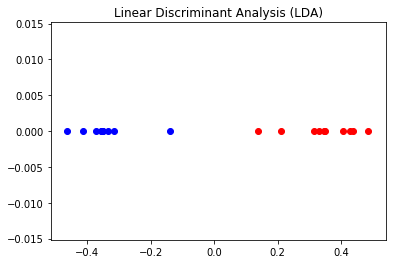

In [32]:
# setting the plot
fig, ax = plt.subplots()
ax.set_title('Linear Discriminant Analysis (LDA)')

# plot the original data
ax.scatter(Y[:N], np.zeros(N), c='r')
ax.scatter(Y[N:], np.zeros(N), c='b')
plt.show()